# MATH-F314
# Travail 2 : Maxwell et la diffusion magnétique. Romain Haag et Maï Nicolas

## Question 1 : Montrer qu'en vertu des équations de Maxwell considérées, le champ magnétique obéit à une équation de diffusion.

In [48]:
from IPython.display import display, Math, Latex
import numpy
import matplotlib.pyplot 
import matplotlib.animation as animation

Les équations de Maxwell qui nous sont fournies sont les suivantes: 

$$  \vec{\nabla} \times \vec{E} = - \partial_t \vec{B} \mbox{ }\mbox{ } \mbox{ (1)}  $$
$$ \vec{\nabla} \times \vec{B} = \mu_0 \vec{J} \mbox{ } \mbox{ }\mbox{ (2)}$$
$$ \vec{\nabla} . \vec{B} = 0 \mbox{ } \mbox{ }\mbox{   (3)} $$

On nous fournit aussi la loi d'Ohm:
$$ \vec{J} = \sigma \vec{E} \mbox{ }\mbox{ }\mbox{ (4)} $$

Calculons le rotationnel de l'équation (2): 
$$ \vec{\nabla} \times \vec{\nabla} \times \vec{B} = \vec{\nabla} (\vec{\nabla}.\vec{B}) - \vec{\nabla}^2\vec{B} $$
$$ \mbox{ et avec (3) } = -  \vec{\nabla}^2\vec{B} $$  

Par les équations (1) et (4).

$$ \vec{\nabla} \times \mu_0 \vec{J} = \mu_0 \sigma \vec{\nabla} \times \vec{E} = -\mu_0 \sigma \partial_t \vec{B} $$ 

On obtient donc, après avoir calculé le rotationnel des deux membres, l'équation

$$ \vec{\nabla}^2 \vec{B} = \mu_0 \sigma \partial_t \vec{B} $$

qui est bien une équation de diffusion comme vu dans les modules.


## Question 2: Quelles sont les conditions aux bords pour le champ magnétique dans la configuration choisie?



Pour les conditions au bord sur la surface extérieure du conducteur, on utilise le fait que la composante tangentielle du champ magnétique $\vec{B}$ est discontinue, dû à la présence de courants de surface $\vec{J}$:
$$\vec{n_{1,2}} \times (\vec{B_2} - \vec{B_1}) = \mu_0 \vec{J}$$  
où $\vec{n_{1,2}}$ est le vecteur unitaire normal à la surface extérieure du conducteur, dirigé vers l'extérieur, et $\vec{B_2}$ et $\vec{B_1}$ les champs magnétiques respectivement à l'extérieur et à l'intérieur du conducteur, tous les deux considérés à une distance infinitésimale de la surface. Or, $\vec{B_2}$ est nul, ce dont l'on peut se convaincre en voyant le conducteur comme un solénoïde aux spires très serrées et de longueur infinie. On obtient donc l'équation: 
$$\vec{n_{1,2}} \times \vec{B_1} = -\mu_0 \vec{J}$$ 
i.e. pour le champ magnétique dans le conducteur
$$B_{//} = B_z = -\mu_0J = -\mu_0$$

Or, étant donné que les courants de surface tournent dans le plan OXY et que le conducteur est infini, le champ magnétique est orienté parallèlement à OZ. Ceci nous permet de dire que dans le conducteur, à une distance infinitésimale de la surface:
$$\vec{B} = -\mu_0 \vec{u_z}$$
Cette équation provenant de conditions sur $\vec{B}$, posées à une distance arbitrairement petite du bord, nous pouvons considérer cette dernière comme tendant vers $0$ et poser la condition exactement sur la surface. Nous avons donc une condition de Dirichlet sur le bord extérieur du conducteur. Lors de l'implémentation numérique, nous écrirons B pour $B_z$.


Continuons. Nous souhaitons à présent trouver les conditions de bord à l'interface entre le conducteur et le supraconducteur. Nous procédons comme suit. La composante tangentielle du champ électrique est continue:

$$\vec{n_{1,2}}\times ( \vec{E_1}-\vec{E_2} )= 0 $$

Or le champ électrique à l'intérieur du supraconducteur est nul $\vec{E_2} = 0$. Ceci vient du fait que les courants ne peuvent pas diverger et que le champ électrique tend donc vers $0$ lorsque la conductivité tend vers $+\infty$ (voir l'équation (4)).

Par suite: 

$$\vec{n_{1,2}}\times \vec{E_1}=0$$

$$\Rightarrow \vec{n_{1,2}} \times (\frac{\vec{J}}{\sigma})=0$$

$$\Rightarrow \vec{n_{1,2}} \times ( \frac{\vec{\nabla}\times \vec{B}}{\mu_0\sigma})=0$$

où il faut faire attention, car B est le champ à l'extérieur du supraconducteur: il faudra dès lors faire attention, au moment de coder, de bien tenir compte de cela.

$$\Rightarrow \vec{n_{1,2}} \times ( \partial_yB_z \vec{u_x} - \partial_xB_z\vec{u_y})=0 $$

Prenons la surface ou le vecteur $\vec{n_{1,2}}$ est $\vec{u_x}$. On a: 
$$ \vec{u_x} \times ( \partial_yB_z \vec{u_x} - \partial_xB_z\vec{u_y})=0 $$

$$\Rightarrow - \partial_x B_z = 0$$

La condition obtenue est la même pour $-\vec{u_x}$. De même, lorsque le vecteur normal est $\vec{u_y}$ on a la condition

$$\partial_y B_z = 0$$

Nous avons donc quatre conditions de Neumann, qui s'appliquent sur une surface fictive autour de l'interface entre les milieux conducteur et supraconducteur et qui nous dit que la dérivée spatiale du champ magnétique est nulle dans la direction normale à la surface. Dans notre code, nous imposerons donc qu'à chaque itération le champ magnétique prenne la même valeur aux points situés à une distance $dx$ ou $dy$ du contour supraconducteur (selon que l'on est sur le bord horizontal ou vertical) qu'aux points situés à une distance $2dx$ ou $2dy$. 

Nous avons presque tout en main pour implémenter le problème. Il nous manque nos conditions initiales. Celles-ci sont simples: le champ $\vec{B}$ est nul sur tout le domaine à l'instant $t=o$. De plus, il doit rester nul "pour l'éternité" dans le supraconducteur... En effet, nous voyons avec l'équation (1), que dans ce milieu
$$\partial_t\vec{B} = -\vec{\nabla}\times\vec{0} = \vec{O}$$
et que le champ magnétique $\vec{B}$ y est donc constant tout-au-long de l'évolution temporelle du système ! Or, puisqu'initialement il est nul partout, nous obtenons une condition sur la valeur de $\vec{B}$ dans le supraconducteur:

$$\vec{B} = \vec{0}$$.

Grâce aux conditions de Neumann obtenues pour $\vec{B}$ autour du supraconducteur, nous savons que le flux du champ magnétique est nul à travers la surface fictive que nous avions considérée. Le champ magnétique ne peut donc pas évoluer dans le volume qu'elle délimite. Nous considérons donc que la dernière condition obtenue ($\vec{B} = \vec{0}$) est valable non seulement à l'intérieur du supraconducteur, mais aussi sur son bord. Il s'agit donc d'une seconde condition de Dirichlet, qui s'applique sur le bord du supraconducteur. Remarquons que lors de l'implémentation, il sera inutile de poser comme condition supplémentaire $\vec{B} = \vec{0}$ à l'intérieur du supraconducteur, ce qui est garanti par l'absence de flux de $\vec{B}$ à travers l'interface.

# Question 3: Calculer l'évolution au cours du temps du champ magnétique par la méthode d'Euler (forward) dans le temps, et avec une discrétisation centrée d'ordre 2 pour le laplacien.

Ci-dessous, le code pour l'évolution temporelle du champ magnétique.

In [49]:
def f(B,nt,dt,dx,dy,mu,s):
    
    #On définit les positions pour les bords du supraconducteur:
    
    j_1 = int((numpy.shape(B)[1])/3)
    j_2 = int((numpy.shape(B)[1])*(2/3))
    i_1 = int((numpy.shape(B)[0])/3)
    i_2 = int((numpy.shape(B)[0])*(2/3))
    
    # L'indice i fait référence à l'axe x et l'indice j à l'axe y.

    #On fait une discrétisation "forward" sur le temps et centrée d'ordre deux sur les positions.
    
    for n in range (nt):
        Bn = B.copy()
        B[1:-1,1:-1] = Bn[1:-1,1:-1]   + (dt/(mu*s*dx**2))*(Bn[1:-1,2:] + Bn[1:-1,:-2] - 2*Bn[1:-1,1:-1])   + (dt/(mu*s*dy**2))*(Bn[2:,1:-1] + Bn[:-2,1:-1] - 2*Bn[1:-1,1:-1])
        
        #On impose les conditions de Dirichlet sur le bord du supraconducteur:
        
        B[i_1,j_1:j_2+1] = 0
        B[i_2,j_1:j_2+1] = 0
        B[i_1:i_2+1,j_1] = 0
        B[i_1:i_2+1,j_2] = 0

        #Conditions de Neumann (autour du bord du supraconducteur):
        
        B[i_1-1,j_1:j_2+1] = B[i_1-2,j_1:j_2+1]
        B[i_2+1,j_1:j_2+1] = B[i_2+2,j_1:j_2+1]
        B[i_1:i_2+1,j_1-1] = B[i_1:i_2+1,j_1-2]
        B[i_1:i_2+1,j_2+1] = B[i_1:i_2+1,j_2+2]
        
        
        #Conditions de Dirichlet sur le bord extérieur:
        
        B[0,:] = -mu
        B[-1,:] = -mu
        B[:,0] = -mu
        B[:,-1] = -mu
        
    
    return B

In [50]:
L = 1.5*10**(-2) #Côté du conducteur carré en m

nx = 121 #Discrétisation de notre domaine
ny = 121

dx = L/(nx-1)  #On détermine le "pas spatial" 
dy = L/(ny-1)

x = numpy.linspace(0,L,nx)  
y = numpy.linspace(0,L,ny)

s = 5.96*10**(7) #conductivité du conducteur en S/m
mu = 1.26*10**(-6) #perméabilité magnétique du vide en N/A²

B_0 = numpy.zeros((nx,ny))#Condition initiale

In [51]:
#On cherche un pas de temps dt_stab qui ne pose pas problème pour la discrétisation,
#qui puisse nous assurer une certaine stabilité

sigma = 0.25
dt_stab = sigma*mu*s*(dx)**2
print(dt_stab)

2.9334375e-07


On peut choisir un dt plus petit si on le souhaite, la stabilité reste assurée. Nous alons prendre $dt=2,5.10^{-7}s$.
Il ne nous reste plus qu'à faire tourner notre fonction. Pour commencer, prenons un petit nombre d'itérations dans le temps, nous l'augmenterons petit à petit.

In [52]:
dt = 2.5e-7

In [53]:
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [54]:
nt_1=1
B_0 = numpy.zeros((nx,ny))

B_1 = f(B_0,nt_1,dt,dx,dy,mu,s)

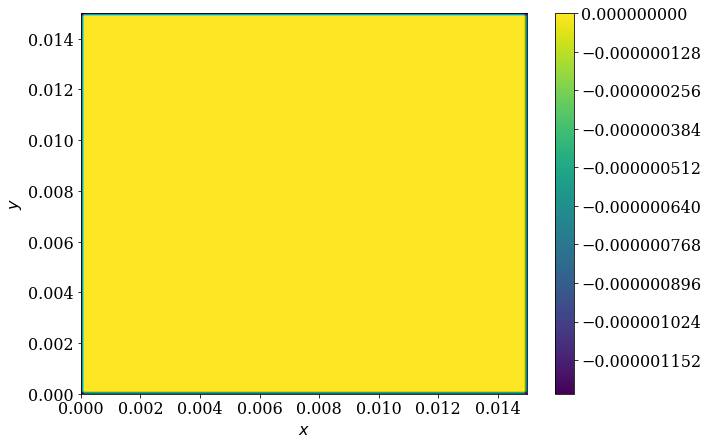

In [55]:
pyplot.figure(figsize=(10,7))
pyplot.contourf(x,y,B_1,200,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

On voit sur la figure obtenue un champ magnétique uniformément nul, mis à part sur le bord, où il semble que sa valeur augmente subitement. Ce résultat est cohérent avec nos conditions initiales et les conditions de Dirichlet imposées à l'instant $t+dt$. C'est rassurant... Voyons maintenant ce qu'il se passe un peu plus tard.

In [56]:
nt_2=100
B_0 = numpy.zeros((nx,ny))
B_2 = f(B_0,nt_2,dt,dx,dy,mu,s)

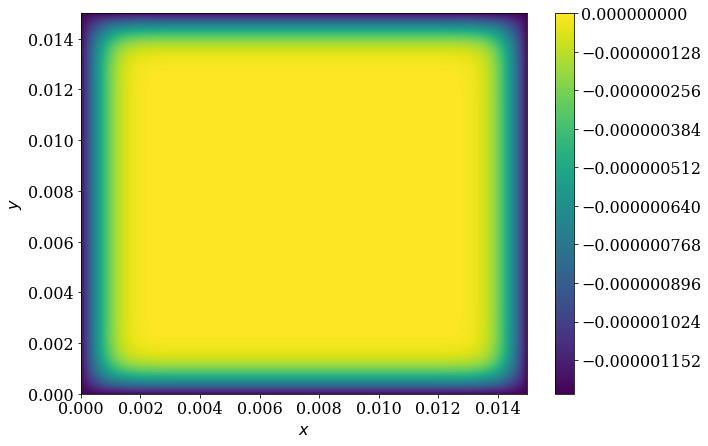

In [57]:
pyplot.figure(figsize=(10,7))
pyplot.contourf(x,y,B_2,200,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

Comme attendu, le champ magnétique se propage vers l'intérieur de notre domaine.

In [58]:
nt_3=10000
B_0 = numpy.zeros((nx,ny))
B_3 = f(B_0,nt_3,dt,dx,dy,mu,s)

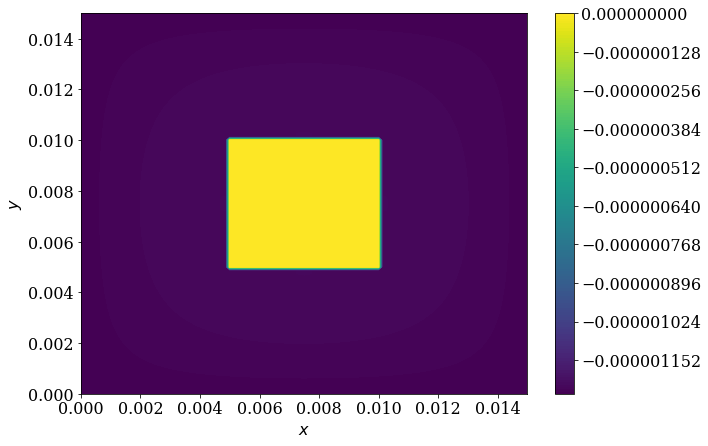

In [59]:
pyplot.figure(figsize=(10,7))
pyplot.contourf(x,y,B_3,200,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

Pour un temps suffisamment long après imposition des courants au bord, le champ est uniforme dans le conducteur (et reste nul au sein du supraconducteur), comme il se doit pour un phénomène de diffusion.

Nous remarquons une ligne bleue/verte entre le supraconducteur et le conducteur et ce, aussi long soit le temps choisi. Néanmoins, nous ne nous expliquons pas sa présence. Selon nous, le champ devrait être uniforme dans le conducteur et nul dans le supraconducteur, sans valeur intermédiaire.

## Question 4 : Animation.

On réalise ici une animation de l'évolution temporelle du champ magnétique sur le domaine considéré.

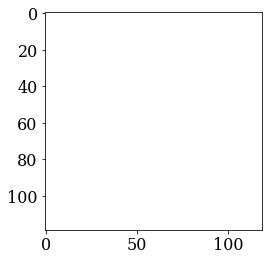

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()



ims = []

B = numpy.zeros((nx,ny))
nt=3500


i_1 = int((numpy.shape(B)[0])/3)
i_2 = int((numpy.shape(B)[0])*(2/3))
j_1 = int((numpy.shape(B)[1])/3)
j_2 = int((numpy.shape(B)[1])*(2/3))

    
for i in range(nt):   # On réutilise la boucle avec laquelle on a calculé l'évolution temporelle de B.
    
    Bn = B.copy()
    B[1:-1,1:-1] = Bn[1:-1,1:-1]   + (dt/(mu*s*dx**2))*(Bn[1:-1,2:] + Bn[1:-1,:-2] - 2*Bn[1:-1,1:-1])   + (dt/(mu*s*dy**2))*(Bn[2:,1:-1] + Bn[:-2,1:-1] - 2*Bn[1:-1,1:-1])
    

    B[i_1,j_1:j_2+1] = 0
    B[i_2,j_1:j_2+1] = 0
    B[i_1:i_2+1,j_1] = 0
    B[i_1:i_2+1,j_2] = 0

    B[i_1-1,j_1:j_2+1] = B[i_1-2,j_1:j_2+1]
    B[i_2+1,j_1:j_2+1] = B[i_2+2,j_1:j_2+1]
    B[i_1:i_2+1,j_1-1] = B[i_1:i_2+1,j_1-2]
    B[i_1:i_2+1,j_2+1] = B[i_1:i_2+1,j_2+2]
        
    B[0,:] = -mu
    B[-1,:] = -mu
    B[:,0] = -mu
    B[:,-1] = -mu    
    
    if i%10 == 0 : # on ne prend qu'une image sur 10 afin de rendre la vie plus facile à notre ordinateur.
        im = plt.imshow(B[1:-1,1:-1], animated=True)  # Nous donne l'image de B sur tout notre domaine à l'instant i*dt. 
        ims.append([im])                              # "ims" est une liste de matrice qui contient le profil spatial
                                                      # de B sur notre domaine, à des instants successifs
                                                      # À chaque itération, (ou plutôt une itération sur dix)
                                                      # une image de B est rajoutée à la liste.
        
        
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000) 



plt.show()


In [61]:
from IPython.display import HTML

HTML(ani.to_html5_video())

## Question 5 : Que vaut, à l'instant $t=1.25\cdot 10^{-3}s$, la valeur du champ magnétique en $(x,y,z)=(2.5\cdot 10^{-3}{\rm m},2.5\cdot 10^{-3}{\rm m},0{\rm m})$?

De la même manière que nous avions défini les limites du supraconducteur à la question 3, nous allons ici déterminer les indices associés aux coordonnées de position auxquelles nous voudrons connaître la valeur du champ magnétique.

In [62]:
#On cherche la valeur de B en (0.0025,0.0025,0), après 1.25e-3 s:

B_0 = numpy.zeros((nx,ny))

k = int((numpy.shape(B_0)[0])/6)
p = int((numpy.shape(B_0)[1])/6)

t = 1.25e-3
nt = int(t/dt)  # On détermine le nombre de pas correspondant au temps choisi.

B_t = f(B_0,nt,dt,dx,dy,mu,s)
  
print(B_t[k,p])

-1.18247598051e-06


## Question 6 : Que vaut, à l'instant $t=1.25\cdot 10^{-3}s$, la valeur de la densité de courant éléctrique ${\bf J}$ en $(x,y,z)=(2.5\cdot 10^{-3}{\rm m},2.5\cdot 10^{-3}{\rm m},0 {\rm m})$?

Reprenons notre formule (2) : 
$$\vec{\nabla}\times \vec{B} = \mu_0 \vec{J}$$
On a donc, puisque les quantités $B_x$ et $B_y$ sont nulles,
$$\left\{ \begin{array} {11}
\partial_yB_z=\mu_0J_x \\
-\partial_xB_z=\mu_0J_y \end{array} \right. $$

Compte tenu de cette considération, nous avons: 

$$\left\{ \begin{array} {11}
J_x=\frac{1}{\mu_0}\frac{B_z(x,y+dy)-B_z(x,y)}{dy} \\
J_y=\frac{-1}{\mu_0}\frac{B_z(x+dx,y)-B_z(x,y)}{dx} \end{array} \right. $$

Les deux dernières équations sont obtenues en réalisant une discrétisation "forward" sur les positions pour les dérivées spatiales. Nous allons tout-de-suite les implémenter, en utilisant la discrétisation choisie à la question 3. C'est absolument tout ce qu'il nous faut. Nous avons déjà les $B_z(x+dx,y)$ et $B_z(x,y+dy)$. Il suffit de les piocher dans la matrice B_t que nous venons de construire, ils correspondent respectivement aux indices (k+1,p) et (k,p+1). 

In [63]:
B_t_center=B_t[k,p]
B_t_x_forward = B_t[k+1,p]
B_t_y_forward = B_t[k,p+1]


#On cherche la valeur de J au même point, même instant qu'à la question 6:

J_x = (1/(mu*dy))*(B_t_y_forward - B_t_center)
J_y = (1/(mu*dx))*(B_t_center - B_t_x_forward)

J = numpy.array((J_x,J_y))
J_value = numpy.sqrt(J_x**2+J_y**2)

print(J, J_value)

[ 20.59328003 -20.59328003] 29.1232959162


## Question 7 : Que vaut, à l'instant $t=1.25\cdot 10^{-2}s$, la valeur du flux du champ magnétique à travers la section $z=0$ du conducteur? Justifier cette valeur.

Nous avons un domaine que nous avons discrétisé en $n_x.n_y$ points. En chacun de ces points, B_t prend une certaine valeur. Une première approche serait de prendre pour chaque point: $x_i$ et $y_j$, correspondant aux indices (i,j) une surface $\sigma_{ij}$ de taille $dx.dy$ et la valeur de $B_z$  en $(x_i , y_j)=B_{ij}$.

Rappelons d'abord la définition du flux d'un champ $\vec{B}$ à travers une surface $\Sigma$: 
$$\int_{\Sigma}\vec{B}\vec{d\Sigma}$$ 

où $\vec{d\Sigma}$ est l'élément d'aire orienté positivement selon $z$.
Comme dans notre problème, le champ $\vec{B}$ est parallèle à ce vecteur, nous n'avons pas à nous soucier de l'angle formé entre les deux. Pour avoir une valeur numérique de ce flux, nous procédons comme suit. À chaque petite surface $\sigma_{ij}$, nous pouvons associer le flux: $\phi_{ij}=B_{ij}\sigma_{ij}$. Pour obtenir le flux total, il ne reste plus qu'à sommer sur tous les i,j. Formellement: 
$$\Phi_{tot}=\sum_{i}^{n_x}\sum_{j}^{n_y}B_{ij}\sigma_{ij}=\sum_{i}^{n_x}\sum_{j}^{n_y}B_{ij}dxdy$$
Ce flux ne nous fournit pas une assez bonne approximation car la valeur de $B_{ij}$ n'est pas centrée sur l'élément de surface $\sigma_{ij}$  au travers duquel on voudrait calculer son flux. Il faut donc faire quelques petits ajustements. 

On va tout d'abord considérer le domaine de taille $dx(n_x-2).dy(n_y-2)$. Il s'agit de notre domaine sans les valeurs de champ indicées $i=0$, $i=nx$, $j=0$, $j=ny$. On peut s'imaginer ce domaine-ci comme notre ancien domaine auquel on aurait enlevé des bandes extérieures de largeurs $\frac{dx}{2}$ ou $\frac{dy}{2}$, suivant qu'il s'agit d'un côté vertical ou horizontal. En faisant ainsi, on s'assure que les nouveaux éléments de surface (leur aire n'a pas changé) que l'on considère sont bien centrés sur les points où l'on a calculé la valeur de $B_z$.

On effectue une somme comme expliqué précédemment, à laquelle il faut encore ajouter la contribution des bandes et des coins.

Encore une fois, on aimerait que pour les éléments de surface que l'on considère, le $B_{i,j}$ associé soit bien centré. Pour que ce soit bien le cas, on va effectuer une moyenne pondérée entre la valeur que prend $B_z$ sur le bord du conducteur et sa valeur à une distance dx ou dy du bord. Par raison de symétrie, la valeur que prend $B_z$ sera la même sur toute la droite parallèle au bord, on pourra donc choisir l'un des deux indices arbitrairement. Par exemple, considérons le bord ou $x=0 \leftrightarrow i=0$. Le $B_z$ pondéré sera une somme de la valeur de $B_z$ au bord et de $B_z$ en (i=1, j="valeur arbitraire comprise entre 2 et ny-2 inclus"). En effet, la symétrie n'est pas vraie pour j=0, 1, ny-1, ny. On donnera plus de poids à la valeur de $B_z$ au bord, puisqu'elle correspond à un point plus proche du centre de la surface considérée ($dx/4$) que la valeur d'à coté (à une distance $\frac{3dx}{4}$). De plus, par symétrie du problème on peut considérer un seul coté et multiplier sa contribution au flux par 4.

Ainsi, notre approximation de la valeur du champ magnétique sur la bande verticale gauche est:
$$ B_{bord}=-\frac{3}{4}\mu_0 +\frac{1}{4}B(x=dx,y) $$
où $\frac{3}{4}$ et $\frac{1}{4}$ sont nos facteurs de pondérations.

La contribution totale des bords au flux est donc:
$$ B_{bord}.\frac{1}{2}dx.dy.(2.(n_x-1)+2.(n_y-1)) = B_{bord}.dx.dy.(n_x+n_y-2)$$
où le facteur $\frac{1}{2}$ provient du fait que l'on considère des élements de lageur $\frac{dx}{2}$ ou $\frac{dy}{2}$.

Il ne nous reste plus qu'à déterminer les contributions des coins. Pour ce faire, on procède de la même manière, sauf que l'on considère comme valeurs aux bords les points: (0,0); (0,ny); (nx,ny); (nx,0) que l'on moyenne avec les valeurs (1,1); (1,ny-1); (nx-1,ny-1) et (nx-1,1). L'élément de surface considéré ici est d'aire $\frac{dx.dy}{2}$. Par raison de symétrie à nouveau, on peut considérer la contribution d'un seul coin au flux total et la multiplier par 4.

Il est temps de mettre tout cela sous forme de code.

In [64]:
L = 1.5*10**(-2) #Côté du conducteur carré en m

nx = 121 #Discrétisation de notre domaine
ny = 121

dx = L/(nx)  #On détermine le "pas spatial" 
dy = L/(ny)

#On cherche la valeur du flux de B à travers la section transverse, après 1.25e-2 s:
B_0 = numpy.zeros((nx,ny))
t2 = 1.25e-2
nt2 = int(t2/dt)
B_t2 = f(B_0,nt2,dt,dx,dy,mu,s)

Flux = 0
for n in range(1,nx-1):    #on itère sur y dans une itération sur x
    for q in range(1,ny-1):
        Flux = Flux + (B_t2[n,q]*dx*dy)
B_bord = (-mu*3/4)+(B[1,2]*1/4)       #champ magnétique pondéré en un point situé sur la bande
B_coins = (-mu*3/4)+(B[1,1]*1/4)      #champ magnétique pondéré en un coin
Flux = Flux + B_bord*dx*dy*(nx+ny-2) + B_coins*dx*dy    # On somme toutes le contributions au flux
print(Flux)

#Ce flux est le flux dans la direction "z", donc il est bien positif dans le sens de B.

-2.46321391306e-10


# Conclusion:

Nous avons étudié ici l'évolution temporelle d'un champ magnétique obéissant à une équation de diffusion, dans un conducteur comportant une cavité supraconductrice.

Les conditions de bord sur le champ magnétique, permettant l'implémentation numérique du problème, que nous avons obtenues sont au nombre de trois, et sont dérivées des équations de Maxwell et de la loi d'Ohm. Ce sont deux conditions de Dirichlet, déterminées sur la surface extérieure du conducteur et sur l'interface entre les deux milieurx, ainsi qu'une condition de Neumann dans le conducteur, "contre" l'interface.

Après avoir construit un code résolvant l'équation de diffusion du champ magnétique par la méthodes de discrétisation des dérivées spatiales et temporelles et en y introduisant les conditions de bord déterminées au préalable, nous avons obtenu un champ qui se diffuse, comme attendu. Nous avons animé cette diffusion pour rendre plus clair le phénomène sous le point de vue qualitatif.

Nous avons ensuite effectué plusieurs évaluations numériques. Les deux premières consitaient à déterminer, à un certain endroit du conducteur, les valeurs du champ et de la densité du courant électrique induit, et ce après un temps de l'ordre de $10^{-3}s$. Ce temps est plus ou moins de l'ordre des durées caractéristiques du processus de diffusion, que nous évaluons approximativement à $10^{-4}$ ou $10^{-3}s$ au vu du temps nécessaire à atteindre une uniformité spatiale du champ magnétique (cfr animation). La valeur obtenue pour le champ ($\approx-1.18 10^{-6}T$) est effectivement très proche de ce qu'elle est dans le cas uniforme, c'est-à-dire $-1.26 10^{-6}T$. La solution obtenue pour $\vec{J}$ est (20.59328003 $\frac{A}{m^2}$, -20.59328003 $\frac{A}{m^2}$, 0 $\frac{A}{m^2}$): on voit que le courant induit en ce point est orienté de telle sorte qu'il semble "tourner" dans le sens inverse de celui des courants au bord. Cette différence peut s'expliquer par le fait que ces courants correspondent à une force électromotrice, qui apparaît "pour" induire un champ magnétique visant à compenser la variation du champ magnétique induite par les courants de surface. Ce champ induit doit être de sens opposé (positif selon OZ), donc les courants qui l'induisent doivent tourner dans l'autre sens.

Enfin, nous avons calculé, sur un intervalle de temps (idéalement) infinitésimal dt, le flux du champ magnétique à travers la section du conducteur. Nous avons discrétisé l'intégrale définissant cette quantité, et effectué un "shift" sur le découpage du domaine, afin que chaque valeur de $\vec{B}$ considérée soit bien centrée sur l'élément de surface dont l'aire donnera sa contribution au flux total. Nous avons par ailleurs travaillé sur les bords, afin d'obtenir une meilleure approximation du flux sur cette zone. La valeur obtenue est de $-2.46321391306.10^{-10} \frac{T}{s.m^2}$.